In [2]:
from keras.datasets import mnist

data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

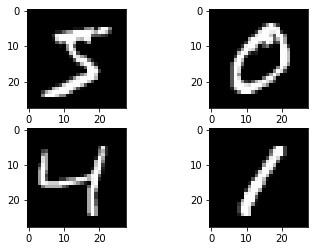

In [5]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))


In [6]:
x_train[0].shape

(28, 28)

In [12]:
x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28*28)).astype('float32')


In [13]:
x_train = x_train/255
x_test = x_test/255

In [16]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential()

#first hidden layer
model.add(Dense(32, input_dim = 28*28, activation='relu'))

#second hidden layer
model.add(Dense(64, activation='relu'))

#Add output layer having 10 neurons (since there are 10 classes/ categories in the output variable)
model.add(Dense(10, activation='softmax'))


In [24]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=100)

Epoch 1/50
480/480 [==============================] - 1s 3ms/step - loss: 0.0155 - accuracy: 0.9956 - val_loss: 0.1494 - val_accuracy: 0.9681
Epoch 2/50
480/480 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.1386 - val_accuracy: 0.9693
Epoch 3/50
480/480 [==============================] - 1s 3ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.1423 - val_accuracy: 0.9689
Epoch 4/50
480/480 [==============================] - 1s 3ms/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.1496 - val_accuracy: 0.9695
Epoch 5/50
480/480 [==============================] - 1s 3ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.1509 - val_accuracy: 0.9688
Epoch 6/50
480/480 [==============================] - 1s 3ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.1447 - val_accuracy: 0.9691
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9966 - val_loss: 0.1442 - val_accuracy: 0.9709
Epoch 

In [31]:
scores = model.evaluate(x_test, y_test)
print(scores)

313/313 [==============================] - 1s 2ms/step - loss: 0.1990 - accuracy: 0.9719
[0.19901062548160553, 0.9718999862670898]


In [30]:
predictions = model.predict(x_test)